# This is a random jupyter notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

In [2]:
# Function to generate a sine wave

# Function to generate a sine wave
# Now includes spatial dependence: sin(2πft - kx + phase)
def generate_sine_wave(amplitude, frequency, phase, wavenumber, position, duration=5.0, sampling_rate=1000):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    y = amplitude * np.sin(2 * np.pi * frequency * t - wavenumber * position + phase)
    return t, y

# Function to update plot based on slider inputs
def update_plot(amplitude, frequency, phase, wavenumber, position, zoom_start, zoom_end):
    duration = 2.0         # Duration of the signal in seconds
    sampling_rate = 100000   # Number of samples per second
    t, y = generate_sine_wave(amplitude, frequency, phase, wavenumber, position, duration, sampling_rate)

    # Apply zoom by filtering the time and signal arrays
    zoom_mask = (t >= zoom_start) & (t <= zoom_end)
    t_zoomed = t[zoom_mask]
    y_zoomed = y[zoom_mask]

    plt.figure(figsize=(10, 4))
    plt.plot(t_zoomed, y_zoomed)
    plt.title(f"Sine Wave: {amplitude:.2f}*sin(2π*{frequency:.2f}*t - {wavenumber:.2f}*x + {phase:.2f} rad), x={position:.2f}")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Interactive sliders
interact(update_plot,
         amplitude=FloatSlider(value=2.0, min=0.1, max=5.0, step=0.1, description='Amplitude'),
         frequency=FloatSlider(value=100.0, min=0.0, max=1000.0, step=1, description='Frequency (Hz)'),
         phase=FloatSlider(value=np.pi/2, min=0.0, max=2*np.pi, step=np.pi/8, description='Phase (rad)'),
         wavenumber=FloatSlider(value=4*np.pi, min=0.0, max=10*np.pi, step=np.pi/2, description='Wavenumber (1/m)'),
         position=FloatSlider(value=2.70, min=-3.0, max=3.0, step=0.1, description='Position (m)'),
         zoom_start=FloatSlider(value=.05, min=0.0, max=2.0, step=0.01, description='Zoom Start (s)'),
         zoom_end=FloatSlider(value=.10, min=0.0, max=3.0, step=0.01, description='Zoom End (s)'))


interactive(children=(FloatSlider(value=2.0, description='Amplitude', max=5.0, min=0.1), FloatSlider(value=100…

<function __main__.update_plot(amplitude, frequency, phase, wavenumber, position, zoom_start, zoom_end)>

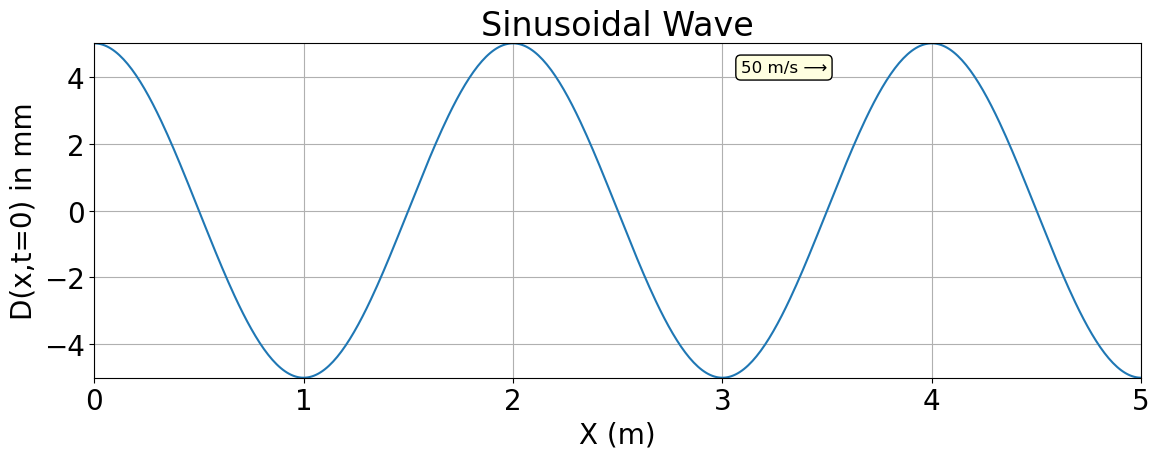

In [3]:
plt.rc('font', size=20) # Set global font size to 20
# Set a constant frequency
frequency = 0.5  # Hz or cycles per unit x

# Create x values
x = np.linspace(0, 10, 1000)

# Compute phase and wave
phase = 2 * np.pi * frequency * x
wave = 5*np.cos(phase)



plt.figure(figsize=(12, 5))
plt.plot(x, wave, label='Position-Dependent Cosine Wave')
plt.title('Sinusoidal Wave')
plt.xlabel('X (m)')
plt.ylabel('D(x,t=0) in mm')
plt.xlim(0,5)
plt.ylim(-5,5)
plt.grid(True)

plt.annotate("50 m/s ⟶",
             xy=(0.7, 0.95), xycoords='axes fraction',
             fontsize=12, ha='right', va='top',
             bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="black", lw=1))

plt.tight_layout()

plt.savefig('Sinusoidal Wave.png')
